In [1]:
# This notebook is for tests generation for state visualizer

from overcooked_ai_py.agents.benchmarking import AgentEvaluator
from overcooked_ai_py.mdp.overcooked_mdp import OvercookedGridworld, OvercookedState, Recipe, SoupState
from overcooked_ai_py.visualization.state_visualizer import StateVisualizer
from overcooked_ai_py.visualization.visualization_utils import show_image_in_ipython
from overcooked_ai_py.utils import generate_temporary_file_path
from overcooked_ai_py.static import FONTS_DIR
from overcooked_ai_py.mdp.layout_generator import POT
import copy
import pygame
import os
import numpy as np
import json


def has_cooking_timer(state, grid):
    for obj in state.objects.values():
        if isinstance(obj, SoupState):
            (x_pos, y_pos) = obj.position
            if obj._cooking_tick > 0 and grid[y_pos][x_pos] == POT:
                print("found cooking obect", obj)
                return True
    return False

Recipe.configure({})
def display_and_export_to_array(test_dict):
    test_dict = copy.deepcopy(test_dict)
    test_dict["kwargs"]["state"] = OvercookedState.from_dict(test_dict["kwargs"]["state"])
    surface =  StateVisualizer(**test_dict["config"]).render_state(**test_dict["kwargs"])
    img_path = generate_temporary_file_path("temporary_visualization", extension=".png")
    pygame.image.save(surface, img_path)
    print("check if image is okay")
    show_image_in_ipython(img_path)
    return pygame.surfarray.array3d(surface)

def save_test_files(test_dicts_list, test_result_arrays, json_filename):
    for d, a in zip(test_dicts_list, test_result_arrays):
        with open(d["result_array_filename"], 'wb') as f:
            np.save(f, a)
    with open(json_filename, "w") as f:
        json.dump(test_dicts_list, f)
        
DEFAULT_VALUES = {
        "height": None, # if None use grid_width - NOTE: can chop down hud if hud is wider than grid
        "width": None, # if None use (hud_height+grid_height)
        "tile_size": 75,
        "window_fps": 30,
        "player_colors": ['blue', 'green'],
        "is_rendering_hud": True,
        "hud_font_size": 10,
        "hud_system_font_name": None, # if set to None use hud_font_path
        # needs to be overwritten with default - every pc has different pathes "hud_font_path": roboto_path, 
        "hud_font_color": (255,255,255), # white
        "hud_data_default_key_order" : ["all_orders", "bonus_orders", "time_left", "score", "potential"],
        "hud_interline_size": 10,
        "hud_margin_bottom": 10,
        "hud_margin_top": 10,
        "hud_margin_left": 10,
        "hud_distance_between_orders": 5,
        "hud_order_size": 15,
        "is_rendering_cooking_timer": True,
        "show_timer_when_cooked": True,
        "cooking_timer_font_size": 20, # # if set to None use cooking_timer_font_path
        # needs to be overwritten with default - every pc has different pathes "cooking_timer_font_path": roboto_path, 
        "cooking_timer_system_font_name": None,
        "cooking_timer_font_color": (255, 0, 0), # red
        "grid": None,
        "background_color": (155, 101, 0) # color of empty counter
    }


pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


Avg rew: 0.00 (std: 0.00, se: 0.00); avg len: 1.00; : 100%|██████████| 1/1 [00:00<00:00, 183.37it/s]

testing test_hud_1 dict
check if image is okay


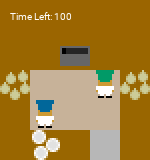

testing test_hud_2 dict
check if image is okay


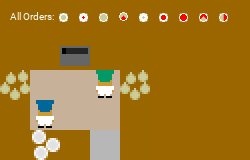

testing test_hud_3 dict
check if image is okay


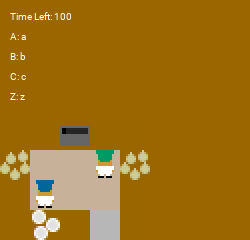

In [2]:
hud_tests = []
hud_test_results = []

agent_eval = AgentEvaluator({"layout_name": "cramped_room"}, {"horizon": 1})
grid = agent_eval.env.mdp.terrain_mtx
trajectory_random_pair = agent_eval.evaluate_random_pair(num_games=1, display=False)
state = trajectory_random_pair["ep_states"][0][0]

config = copy.deepcopy(DEFAULT_VALUES)
config["tile_size"] = 30
hud_data = {"time_left": 100}
kwargs = {"hud_data": hud_data, "grid":grid, "state":state.to_dict()}

test_hud_1 = {"config": config, "kwargs": kwargs, 
             "comment": "Test simple text in hud. NOTE: failing to render stuff outside HUD also fails this test",
             "result_array_filename": "test_hud_1.npy"}
print("testing test_hud_1 dict")
test_hud_1_array = display_and_export_to_array(test_hud_1)
hud_tests.append(test_hud_1)
hud_test_results.append(test_hud_1_array)


config = copy.deepcopy(DEFAULT_VALUES)
config["tile_size"] = 30
config["width"] = 250
hud_data = {"all_orders": trajectory_random_pair["mdp_params"][0]["start_all_orders"]}
kwargs = {"hud_data": hud_data, "grid":grid, "state":state.to_dict()}
test_hud_2 = {"config": config, "kwargs": kwargs, 
             "comment": "Test simple recipes in hud. NOTE: failing to render stuff outside HUD also fails this test",
             "result_array_filename": "test_hud_2.npy"}

print("testing test_hud_2 dict")
test_hud_2_array = display_and_export_to_array(test_hud_2)
hud_tests.append(test_hud_2)
hud_test_results.append(test_hud_2_array)

config = copy.deepcopy(DEFAULT_VALUES)
config["tile_size"] = 30
config["width"] = 250
hud_data = {"time_left": 100, "a":"a", "b": "b", "c": "c",  "z":"z"}
kwargs = {"hud_data": hud_data, "grid":grid, "state":state.to_dict()}
test_hud_3 = {"config": config, "kwargs": kwargs, 
             "comment": "Test chronology of hud based on keys NOTE: failing to render stuff outside HUD also fails this test",
             "result_array_filename": "test_hud_3.npy"}
print("testing test_hud_3 dict")
test_hud_3_array = display_and_export_to_array(test_hud_3)
hud_tests.append(test_hud_3)
hud_test_results.append(test_hud_3_array)

In [3]:
# if all stuff above is ok run this cell
save_test_files(hud_tests, hud_test_results, "render_state_data_test_hud.json")

testing test_size_1 dict
check if image is okay


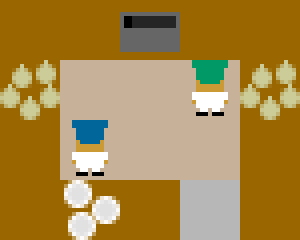

testing test_size_2 dict
check if image is okay


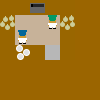

In [4]:
size_tests = []
size_test_results = []
config = copy.deepcopy(DEFAULT_VALUES)
config["tile_size"] = 60
kwargs = {"hud_data": {}, "grid":grid, "state":state.to_dict()}
test_size_1 = {"config": config, "kwargs": kwargs, 
             "comment": "Test of setting of tile_size (no hud)",
             "result_array_filename": "test_size_1.npy"}
print("testing test_size_1 dict")
test_size_1_array = display_and_export_to_array(test_size_1)
size_tests.append(test_size_1)
size_test_results.append(test_size_1_array)

config["tile_size"] = 15
config["height"] = 100
config["width"] = 100
kwargs = {"hud_data": {}, "grid":grid, "state":state.to_dict()}
test_size_2 = {"config": config, "kwargs": kwargs, 
             "comment": "Test of setting of width and height (no hud)",
             "result_array_filename": "test_size_1.npy"}
print("testing test_size_2 dict")
test_size_2_array = display_and_export_to_array(test_size_2)
size_tests.append(test_size_2)
size_test_results.append(test_size_2_array)

In [5]:
# if all stuff above is ok run this cell
save_test_files(size_tests, size_test_results, "render_state_data_test_sizes.json")

Avg rew: 0.00 (std: 0.00, se: 0.00); avg len: 1000.00; : 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]


found cooking obect soup@(2, 0)
Ingredients:	[onion@(2, 0)]
Cooking Tick:	1
test_cooking_timer_1 dict
check if image is okay


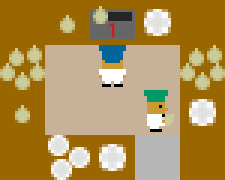

In [6]:
rendered_cooking_timer = False
config = copy.deepcopy(DEFAULT_VALUES)
config["tile_size"] = 45

while not rendered_cooking_timer:
    agent_eval = AgentEvaluator({"layout_name": "cramped_room"}, {"horizon": 1000})
    grid = agent_eval.env.mdp.terrain_mtx
    trajectory_random_pair = agent_eval.evaluate_random_pair(num_games=1, display=False)
    for state in trajectory_random_pair["ep_states"][0]:
        if not rendered_cooking_timer and has_cooking_timer(state, grid):
            kwargs = {"hud_data": {}, "grid":grid, "state":state.to_dict()}
            test_cooking_timer_1 = {"config": config, "kwargs": kwargs, 
             "comment": "Test of setting rendering cooking timer",
             "result_array_filename": "test_cooking_timer_display_1.npy"}
            print("test_cooking_timer_1 dict")
            test_test_cooking_timer_1_array = display_and_export_to_array(test_cooking_timer_1)
            rendered_cooking_timer = True

In [7]:
# if all stuff above is ok run this cell
save_test_files([test_cooking_timer_1], [test_test_cooking_timer_1_array], "render_state_data_test_cooking_display.json")

Avg rew: 50.00 (std: 0.00, se: 0.00); avg len: 1001.00; : 100%|██████████| 1/1 [00:00<00:00,  2.70it/s]


test_various_display_1 dict
check if image is okay


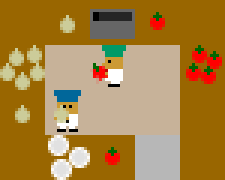

test_various_display_2 dict
check if image is okay


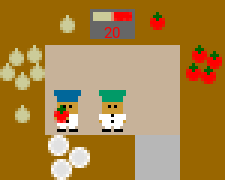

test_various_display_3 dict
check if image is okay


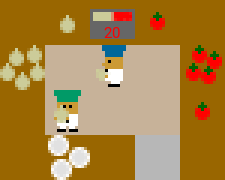

test_various_display_4 dict
check if image is okay


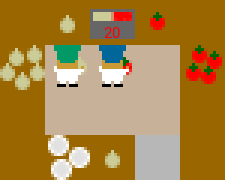

test_various_display_5 dict
check if image is okay


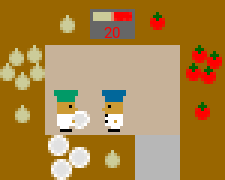

test_various_display_6 dict
check if image is okay


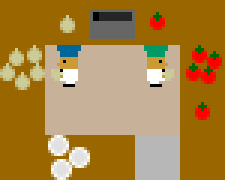

test_various_display_7 dict
check if image is okay


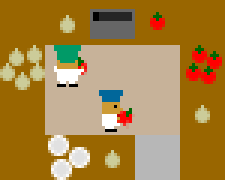

test_various_display_8 dict
check if image is okay


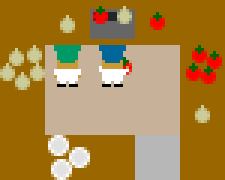

test_various_display_9 dict
check if image is okay


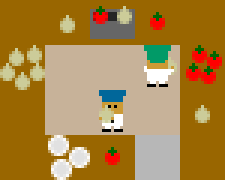

test_various_display_10 dict
check if image is okay


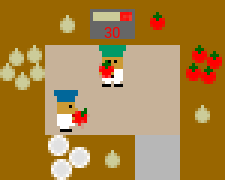

In [8]:
# testing some states hoping it can find unexpected bugs
various_tests = []
various_results = []

config = copy.deepcopy(DEFAULT_VALUES)
config["tile_size"] = 45
config["cooking_timer_font_size"] = 15
agent_eval = AgentEvaluator({"layout_name": "cramped_room_tomato"}, {"horizon": 1001})
grid = agent_eval.env.mdp.terrain_mtx
trajectory_random_pair = agent_eval.evaluate_random_pair(num_games=1, display=False)
for i in range(1, 11):
    state = trajectory_random_pair["ep_states"][0][i*100]
    kwargs = {"hud_data": {}, "grid":grid, "state":state.to_dict()}
    test_dict = {"config": config, "kwargs": kwargs, 
     "comment": "Various tests",
     "result_array_filename": "test_various_display_%d.npy"%i}
    print("test_various_display_%i dict"%i)
    test_array = display_and_export_to_array(test_dict)
    various_tests.append(test_dict)
    various_results.append(test_array)
    

In [9]:
# if all stuff above is ok run this cell
save_test_files(various_tests, various_results, "render_state_data_test_various.json")